# About Dataset

# Context
IPL is one of the most-attended cricket league. We have collected data of almost every match from 2008 to 2022. The collected data is well processed and cleaned using Python tool. With the help of this dataset we can analyze the status of each team whether it is going to win or lose. We can apply various machine learning and deep learning algorithms to predict the probability of win. We have chosen very real features which are used for predicting the probability of win based on current score, balls left, current run rate, wickets left etc.

# Content
This dataset consists of two seperate CSV files: match.csv and delivery.csv . These files contain the information of each match summary and ball-by-ball details, respectively.

# The dataset contains the following columns:
# Columns which we require in match.csv
1. venue :- Specifies the name of the venue where the match was held.
2. method :- It will show if match result came with duckworth lewis method
3. winner :- Specifies the winning team of the match.
4. city :- Specifies the name of the city where the match was held.
5. team1 :- First team.
6. team2 :- Second team.
7. matchId : - This represents a unique identifier for each match, enabling easy referencing and tracking.

# Columns which we require in delivery.csv
1. matchId :- This represents a unique identifier for each match, enabling easy referencing and tracking.
3. over_ball :- It shows howmany overs and balls are played.
4. batting_team :-(current) team for batting in 2nd inning.
5. bowling_team :-(previous) team for bowling in 2nd inning.
6. batsman_runs :- It show runs scored by batsman.
10. extras :- It show extra runs.
11. total_runs :- It show total runs after every ball.
12. isWide :- It show if the ball is wide if it is then it show runs of that ball.
13. isNoBall :- It show if the ball is Noball if it is then it show runs of that ball.
14. Byes :- Shows the runs for Byes.
15. LegByes :- shows the runs of legbyes.
16. dismissal_kind :- It show how the player is out.
17. player_dismissed :- It show if the player dismissed or not after every ball

# From the data i also created some new columns
1. runs_left :- It show how many runs left to score after every ball.
2. balls_left :- It show how many balls left after every ball.
3. wickets_left :- It show how many wickets left.
4. Target :- It show the target score for batting team in second inning.
5. current_runrate :- It show what is the current runrate after every ball.
6. required_rr :- It show what is the required runrate after every ball.
7. result :- It show 1 if team 2 (currently batting team) won otherwise 0.


In [1]:
# Importing the necessary libraries
import numpy as np  # Importing the NumPy library and aliasing it as 'np'
import pandas as pd  # Importing the Pandas library and aliasing it as 'pd'

# Suppressing warning messages
import warnings  # Importing the 'warnings' module
warnings.filterwarnings('ignore')  # Using the filterwarnings() function to ignore warnings


In [2]:
# Reading a CSV file into a Pandas DataFrame
match = pd.read_csv("match.csv")  # Using the read_csv() function from Pandas to read a CSV file and store its contents in the 'match' DataFrame

# Displaying the contents of the DataFrame
match  # Outputting the 'match' DataFrame to display its contents


,venue,umpire2,winner_runs,date,method,reserve_umpire,winner,city,balls_per_over,outcome,...,toss_winner,toss_decision,date2,tv_umpire,season,umpire1,event,neutralvenue,player_of_match,matchId
0,M Chinnaswamy Stadium,RE Koertzen,140.0,18-04-2008,NaN,VN Kulkarni,Kolkata Knight Riders,Bangalore,6,NaN,...,Royal Challengers Bangalore,field,NaN,AM Saheba,2007/08,Asad Rauf,Indian Premier League,NaN,BB McCullum,335982
1,"Punjab Cricket Association Stadium, Mohali",SL Shastri,33.0,19-04-2008,NaN,MSS Ranawat,Chennai Super Kings,Chandigarh,6,NaN,...,Chennai Super Kings,bat,NaN,RB Tiffin,2007/08,MR Benson,Indian Premier League,NaN,MEK Hussey,335983
2,Feroz Shah Kotla,GA Pratapkumar,NaN,19-04-2008,NaN,NaN,Delhi Daredevils,Delhi,6,NaN,...,Rajasthan Royals,bat,NaN,IL Howell,2007/08,Aleem Dar,Indian Premier League,NaN,MF Maharoof,335984
3,Wankhede Stadium,DJ Harper,NaN,20-04-2008,NaN,SN Bandekar,Royal Challengers Bangalore,Mumbai,6,NaN,...,Mumbai Indians,bat,NaN,AV Jayaprakash,2007/08,SJ Davis,Indian Premier League,NaN,MV Boucher,335985
4,Eden Gardens,K Hariharan,NaN,20-04-2008,NaN,F Gomes,Kolkata Knight Riders,Kolkata,6,NaN,...,Deccan Chargers,bat,NaN,Asad Rauf,2007/08,BF Bowden,Indian Premier League,NaN,DJ Hussey,335986
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
945,"Wankhede Stadium, Mumbai",NA Patwardhan,NaN,22-05-2022,NaN,Navdeep Singh,Punjab Kings,Mumbai,6,NaN,...,Sunrisers Hyderabad,bat,NaN,CB Gaffaney,2022,AK Chaudhary,Indian Premier League,NaN,Harpreet Brar,1304116
946,"Eden Gardens, Kolkata",VK Sharma,NaN,24-05-2022,NaN,J Madanagopal,Gujarat Titans,Kolkata,6,NaN,...,Gujarat Titans,field,NaN,MA Gough,2022,BNJ Oxenford,Indian Premier League,NaN,DA Miller,1312197
947,"Eden Gardens, Kolkata",MA Gough,14.0,25-05-2022,NaN,VK Sharma,Royal Challengers Bangalore,Kolkata,6,NaN,...,Lucknow Super Giants,field,NaN,BNJ Oxenford,2022,J Madanagopal,Indian Premier League,NaN,RM Patidar,1312198
948,"Narendra Modi Stadium, Ahmedabad",Nitin Menon,NaN,27-05-2022,NaN,KN Ananthapadmanabhan,Rajasthan Royals,Ahmedabad,6,NaN,...,Rajasthan Royals,field,NaN,AK Chaudhary,2022,CB Gaffaney,Indian Premier League,NaN,JC Buttler,1312199


In [3]:
# Accessing and displaying the column names of a DataFrame
match.columns  # Accessing the 'columns' attribute of the 'match' DataFrame to retrieve and display its column names


Index(['venue', 'umpire2', 'winner_runs', 'date', 'method', 'reserve_umpire',
       'winner', 'city', 'balls_per_over', 'outcome', 'match_number',
       'match_referee', 'team1', 'eliminator', 'date1', 'gender', 'team2',
       'winner_wickets', 'toss_winner', 'toss_decision', 'date2', 'tv_umpire',
       'season', 'umpire1', 'event', 'neutralvenue', 'player_of_match',
       'matchId'],
      dtype='object')

In [4]:
# Retrieving unique values from a specific column of a DataFrame
match['winner'].unique()  # Using the 'unique()' function to retrieve and display the unique values in the 'winner' column of the 'match' DataFrame


array(['Kolkata Knight Riders', 'Chennai Super Kings', 'Delhi Daredevils',
       'Royal Challengers Bangalore', 'Rajasthan Royals',
       'Kings XI Punjab', 'Deccan Chargers', 'Mumbai Indians', nan,
       'Pune Warriors', 'Kochi Tuskers Kerala', 'Sunrisers Hyderabad',
       'Rising Pune Supergiants', 'Gujarat Lions',
       'Rising Pune Supergiant', 'Delhi Capitals', 'Punjab Kings',
       'Gujarat Titans', 'Lucknow Super Giants'], dtype=object)

# After checking unique values in winner column i found that there are some teams that are currently not playing ipl and some teams names are changed 

In [5]:
# Creating a list of teams that are currently playing.
teams = [
    'Sunrisers Hyderabad', 'Mumbai Indians',
    'Royal Challengers Bangalore', 'Kolkata Knight Riders',
    'Kings XI Punjab', 'Chennai Super Kings', 'Rajasthan Royals',
    'Delhi Capitals', 'Gujarat Titans', 'Lucknow Super Giants'
]


In [6]:
# Updating team and winner names in a DataFrame
match['team1'] = match['team1'].str.replace('Delhi Daredevils', 'Delhi Capitals')
match['team2'] = match['team2'].str.replace('Delhi Daredevils', 'Delhi Capitals')
match['team1'] = match['team1'].str.replace('Deccan Chargers', 'Sunrisers Hyderabad')
match['team2'] = match['team2'].str.replace('Deccan Chargers', 'Sunrisers Hyderabad')
match['team1'] = match['team1'].str.replace('Punjab Kings', 'Kings XI Punjab')
match['team2'] = match['team2'].str.replace('Punjab Kings', 'Kings XI Punjab')
match['winner'] = match['winner'].str.replace('Delhi Daredevils', 'Delhi Capitals')
match['winner'] = match['winner'].str.replace('Deccan Chargers', 'Sunrisers Hyderabad')
match['winner'] = match['winner'].str.replace('Punjab Kings', 'Kings XI Punjab')


# Updated the names of teams in winner column and in two more columns that are team1 and team2

In [7]:
# Filtering the 'match' DataFrame based on specified teams that are currently playing
match = match[match['team1'].isin(teams)]
match = match[match['team2'].isin(teams)]
match = match[match['winner'].isin(teams)]


In [8]:
# Reading a CSV file into a Pandas DataFrame
delivery = pd.read_csv("delivery.csv")  # Using the read_csv() function from Pandas to read a CSV file and store its contents in the 'delivery' DataFrame

# Displaying the contents of the DataFrame
delivery  # Outputting the 'delivery' DataFrame to display its contents


,matchId,inning,over_ball,over,ball,batting_team,bowling_team,batsman,non_striker,bowler,...,extras,total_runs,isWide,isNoBall,Byes,LegByes,Penalty,dismissal_kind,player_dismissed,date
0,335982,1,0.1,0,1,Kolkata Knight Riders,Royal Challengers Bangalore,SC Ganguly,BB McCullum,P Kumar,...,1,1.0,NaN,NaN,NaN,1.0,NaN,NaN,NaN,18-04-2008
1,335982,1,0.2,0,2,Kolkata Knight Riders,Royal Challengers Bangalore,BB McCullum,SC Ganguly,P Kumar,...,0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,18-04-2008
2,335982,1,0.3,0,3,Kolkata Knight Riders,Royal Challengers Bangalore,BB McCullum,SC Ganguly,P Kumar,...,1,1.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,18-04-2008
3,335982,1,0.4,0,4,Kolkata Knight Riders,Royal Challengers Bangalore,BB McCullum,SC Ganguly,P Kumar,...,0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,18-04-2008
4,335982,1,0.5,0,5,Kolkata Knight Riders,Royal Challengers Bangalore,BB McCullum,SC Ganguly,P Kumar,...,0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,18-04-2008
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
225949,1312200,2,17.3,17,3,Gujarat Titans,Rajasthan Royals,DA Miller,Shubman Gill,R Ashwin,...,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,29-05-2022
225950,1312200,2,17.4,17,4,Gujarat Titans,Rajasthan Royals,Shubman Gill,DA Miller,R Ashwin,...,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,29-05-2022
225951,1312200,2,17.5,17,5,Gujarat Titans,Rajasthan Royals,Shubman Gill,DA Miller,R Ashwin,...,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,29-05-2022
225952,1312200,2,17.6,17,6,Gujarat Titans,Rajasthan Royals,DA Miller,Shubman Gill,R Ashwin,...,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,29-05-2022


In [9]:
delivery.columns

Index(['matchId', 'inning', 'over_ball', 'over', 'ball', 'batting_team',
       'bowling_team', 'batsman', 'non_striker', 'bowler', 'batsman_runs',
       'extras', 'total_runs', 'isWide', 'isNoBall', 'Byes', 'LegByes',
       'Penalty', 'dismissal_kind', 'player_dismissed', 'date'],
      dtype='object')

In [10]:
# Retrieving unique values from a specific column of a DataFrame
delivery['batting_team'].unique()  # Using the 'unique()' function to retrieve and display the unique values in the 'batting_team' column of the 'delivery' DataFrame


array(['Kolkata Knight Riders', 'Royal Challengers Bangalore',
       'Chennai Super Kings', 'Kings XI Punjab', 'Rajasthan Royals',
       'Delhi Daredevils', 'Mumbai Indians', 'Deccan Chargers',
       'Kochi Tuskers Kerala', 'Pune Warriors', 'Sunrisers Hyderabad',
       'Rising Pune Supergiants', 'Gujarat Lions',
       'Rising Pune Supergiant', 'Delhi Capitals', 'Punjab Kings',
       'Lucknow Super Giants', 'Gujarat Titans'], dtype=object)

In [11]:
# Updating team names in specific columns of a DataFrame
delivery['batting_team'] = delivery['batting_team'].str.replace('Delhi Daredevils', 'Delhi Capitals')
delivery['bowling_team'] = delivery['bowling_team'].str.replace('Delhi Daredevils', 'Delhi Capitals')
delivery['batting_team'] = delivery['batting_team'].str.replace('Deccan Chargers', 'Sunrisers Hyderabad')
delivery['bowling_team'] = delivery['bowling_team'].str.replace('Deccan Chargers', 'Sunrisers Hyderabad')
delivery['batting_team'] = delivery['batting_team'].str.replace('Punjab Kings', 'Kings XI Punjab')
delivery['bowling_team'] = delivery['bowling_team'].str.replace('Punjab Kings', 'Kings XI Punjab')


In [12]:
# Filtering the 'delivery' DataFrame based on specified teams
delivery = delivery[delivery['batting_team'].isin(teams)]
delivery = delivery[delivery['bowling_team'].isin(teams)]


In [13]:
# Creating a new column in the 'delivery' DataFrame
delivery["total_run"] = delivery["batsman_runs"] + delivery["extras"]
delivery


,matchId,inning,over_ball,over,ball,batting_team,bowling_team,batsman,non_striker,bowler,...,total_runs,isWide,isNoBall,Byes,LegByes,Penalty,dismissal_kind,player_dismissed,date,total_run
0,335982,1,0.1,0,1,Kolkata Knight Riders,Royal Challengers Bangalore,SC Ganguly,BB McCullum,P Kumar,...,1.0,NaN,NaN,NaN,1.0,NaN,NaN,NaN,18-04-2008,1
1,335982,1,0.2,0,2,Kolkata Knight Riders,Royal Challengers Bangalore,BB McCullum,SC Ganguly,P Kumar,...,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,18-04-2008,0
2,335982,1,0.3,0,3,Kolkata Knight Riders,Royal Challengers Bangalore,BB McCullum,SC Ganguly,P Kumar,...,1.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,18-04-2008,1
3,335982,1,0.4,0,4,Kolkata Knight Riders,Royal Challengers Bangalore,BB McCullum,SC Ganguly,P Kumar,...,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,18-04-2008,0
4,335982,1,0.5,0,5,Kolkata Knight Riders,Royal Challengers Bangalore,BB McCullum,SC Ganguly,P Kumar,...,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,18-04-2008,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
225949,1312200,2,17.3,17,3,Gujarat Titans,Rajasthan Royals,DA Miller,Shubman Gill,R Ashwin,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,29-05-2022,1
225950,1312200,2,17.4,17,4,Gujarat Titans,Rajasthan Royals,Shubman Gill,DA Miller,R Ashwin,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,29-05-2022,0
225951,1312200,2,17.5,17,5,Gujarat Titans,Rajasthan Royals,Shubman Gill,DA Miller,R Ashwin,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,29-05-2022,1
225952,1312200,2,17.6,17,6,Gujarat Titans,Rajasthan Royals,DA Miller,Shubman Gill,R Ashwin,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,29-05-2022,2


In [14]:
# Grouping and aggregating data in the 'delivery' DataFrame
total_score = delivery.groupby(["matchId", "inning"]).sum()["total_run"].reset_index()

# Adding 1 to the 'total_run' column
total_score["total_run"] += 1

# Displaying the updated 'total_score' DataFrame
total_score


,matchId,inning,total_run
0,335982,1,223
1,335982,2,83
2,335983,1,241
3,335983,2,208
4,335984,1,130
...,...,...,...
1692,1312198,2,194
1693,1312199,1,158
1694,1312199,2,162
1695,1312200,1,131


In [15]:
# Filtering the 'total_score' DataFrame to kepp total_run of 1st inning onely
total_score = total_score[total_score["inning"] == 1]
total_score


,matchId,inning,total_run
0,335982,1,223
2,335983,1,241
4,335984,1,130
6,335985,1,166
8,335986,1,111
...,...,...,...
1687,1304116,1,158
1689,1312197,1,189
1691,1312198,1,208
1693,1312199,1,158


In [16]:
# Merging two DataFrames based on a common column
match_df = match.merge(total_score[["matchId", "total_run"]], left_on="matchId", right_on="matchId")

# Displaying the merged DataFrame
match_df


,venue,umpire2,winner_runs,date,method,reserve_umpire,winner,city,balls_per_over,outcome,...,toss_decision,date2,tv_umpire,season,umpire1,event,neutralvenue,player_of_match,matchId,total_run
0,M Chinnaswamy Stadium,RE Koertzen,140.0,18-04-2008,NaN,VN Kulkarni,Kolkata Knight Riders,Bangalore,6,NaN,...,field,NaN,AM Saheba,2007/08,Asad Rauf,Indian Premier League,NaN,BB McCullum,335982,223
1,"Punjab Cricket Association Stadium, Mohali",SL Shastri,33.0,19-04-2008,NaN,MSS Ranawat,Chennai Super Kings,Chandigarh,6,NaN,...,bat,NaN,RB Tiffin,2007/08,MR Benson,Indian Premier League,NaN,MEK Hussey,335983,241
2,Feroz Shah Kotla,GA Pratapkumar,NaN,19-04-2008,NaN,NaN,Delhi Capitals,Delhi,6,NaN,...,bat,NaN,IL Howell,2007/08,Aleem Dar,Indian Premier League,NaN,MF Maharoof,335984,130
3,Wankhede Stadium,DJ Harper,NaN,20-04-2008,NaN,SN Bandekar,Royal Challengers Bangalore,Mumbai,6,NaN,...,bat,NaN,AV Jayaprakash,2007/08,SJ Davis,Indian Premier League,NaN,MV Boucher,335985,166
4,Eden Gardens,K Hariharan,NaN,20-04-2008,NaN,F Gomes,Kolkata Knight Riders,Kolkata,6,NaN,...,bat,NaN,Asad Rauf,2007/08,BF Bowden,Indian Premier League,NaN,DJ Hussey,335986,111
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
814,"Wankhede Stadium, Mumbai",NA Patwardhan,NaN,22-05-2022,NaN,Navdeep Singh,Kings XI Punjab,Mumbai,6,NaN,...,bat,NaN,CB Gaffaney,2022,AK Chaudhary,Indian Premier League,NaN,Harpreet Brar,1304116,158
815,"Eden Gardens, Kolkata",VK Sharma,NaN,24-05-2022,NaN,J Madanagopal,Gujarat Titans,Kolkata,6,NaN,...,field,NaN,MA Gough,2022,BNJ Oxenford,Indian Premier League,NaN,DA Miller,1312197,189
816,"Eden Gardens, Kolkata",MA Gough,14.0,25-05-2022,NaN,VK Sharma,Royal Challengers Bangalore,Kolkata,6,NaN,...,field,NaN,BNJ Oxenford,2022,J Madanagopal,Indian Premier League,NaN,RM Patidar,1312198,208
817,"Narendra Modi Stadium, Ahmedabad",Nitin Menon,NaN,27-05-2022,NaN,KN Ananthapadmanabhan,Rajasthan Royals,Ahmedabad,6,NaN,...,field,NaN,AK Chaudhary,2022,CB Gaffaney,Indian Premier League,NaN,JC Buttler,1312199,158


In [17]:
# Checking the shape (dimensions) of the DataFrame
match_df.shape

(819, 29)

In [18]:
# Checking for missing values and summing them up
match_df.isnull().sum()

venue                0
umpire2              0
winner_runs        443
date                 0
method             807
reserve_umpire      23
winner               0
city                 0
balls_per_over       0
outcome            819
match_number        54
match_referee        0
team1                0
eliminator         819
date1              817
gender               0
team2                0
winner_wickets     376
toss_winner          0
toss_decision        0
date2              817
tv_umpire            3
season               0
umpire1              0
event                0
neutralvenue       744
player_of_match      0
matchId              0
total_run            0
dtype: int64

In [19]:
# Checking how many matches results came with duckworth lewis method
match_df["method"].value_counts()


D/L    12
Name: method, dtype: int64

In [20]:
# Filling missing values with zeros in the DataFrame
match_df = match_df.fillna(0)

# Displaying the updated DataFrame
match_df


,venue,umpire2,winner_runs,date,method,reserve_umpire,winner,city,balls_per_over,outcome,...,toss_decision,date2,tv_umpire,season,umpire1,event,neutralvenue,player_of_match,matchId,total_run
0,M Chinnaswamy Stadium,RE Koertzen,140.0,18-04-2008,0,VN Kulkarni,Kolkata Knight Riders,Bangalore,6,0,...,field,0,AM Saheba,2007/08,Asad Rauf,Indian Premier League,0,BB McCullum,335982,223
1,"Punjab Cricket Association Stadium, Mohali",SL Shastri,33.0,19-04-2008,0,MSS Ranawat,Chennai Super Kings,Chandigarh,6,0,...,bat,0,RB Tiffin,2007/08,MR Benson,Indian Premier League,0,MEK Hussey,335983,241
2,Feroz Shah Kotla,GA Pratapkumar,0.0,19-04-2008,0,0,Delhi Capitals,Delhi,6,0,...,bat,0,IL Howell,2007/08,Aleem Dar,Indian Premier League,0,MF Maharoof,335984,130
3,Wankhede Stadium,DJ Harper,0.0,20-04-2008,0,SN Bandekar,Royal Challengers Bangalore,Mumbai,6,0,...,bat,0,AV Jayaprakash,2007/08,SJ Davis,Indian Premier League,0,MV Boucher,335985,166
4,Eden Gardens,K Hariharan,0.0,20-04-2008,0,F Gomes,Kolkata Knight Riders,Kolkata,6,0,...,bat,0,Asad Rauf,2007/08,BF Bowden,Indian Premier League,0,DJ Hussey,335986,111
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
814,"Wankhede Stadium, Mumbai",NA Patwardhan,0.0,22-05-2022,0,Navdeep Singh,Kings XI Punjab,Mumbai,6,0,...,bat,0,CB Gaffaney,2022,AK Chaudhary,Indian Premier League,0,Harpreet Brar,1304116,158
815,"Eden Gardens, Kolkata",VK Sharma,0.0,24-05-2022,0,J Madanagopal,Gujarat Titans,Kolkata,6,0,...,field,0,MA Gough,2022,BNJ Oxenford,Indian Premier League,0,DA Miller,1312197,189
816,"Eden Gardens, Kolkata",MA Gough,14.0,25-05-2022,0,VK Sharma,Royal Challengers Bangalore,Kolkata,6,0,...,field,0,BNJ Oxenford,2022,J Madanagopal,Indian Premier League,0,RM Patidar,1312198,208
817,"Narendra Modi Stadium, Ahmedabad",Nitin Menon,0.0,27-05-2022,0,KN Ananthapadmanabhan,Rajasthan Royals,Ahmedabad,6,0,...,field,0,AK Chaudhary,2022,CB Gaffaney,Indian Premier League,0,JC Buttler,1312199,158


In [21]:
# Filtering the DataFrame and keeping onely that which are not affected with duckworth lewis method
match_df = match_df[match_df["method"] == 0]

# Displaying the filtered DataFrame
match_df


,venue,umpire2,winner_runs,date,method,reserve_umpire,winner,city,balls_per_over,outcome,...,toss_decision,date2,tv_umpire,season,umpire1,event,neutralvenue,player_of_match,matchId,total_run
0,M Chinnaswamy Stadium,RE Koertzen,140.0,18-04-2008,0,VN Kulkarni,Kolkata Knight Riders,Bangalore,6,0,...,field,0,AM Saheba,2007/08,Asad Rauf,Indian Premier League,0,BB McCullum,335982,223
1,"Punjab Cricket Association Stadium, Mohali",SL Shastri,33.0,19-04-2008,0,MSS Ranawat,Chennai Super Kings,Chandigarh,6,0,...,bat,0,RB Tiffin,2007/08,MR Benson,Indian Premier League,0,MEK Hussey,335983,241
2,Feroz Shah Kotla,GA Pratapkumar,0.0,19-04-2008,0,0,Delhi Capitals,Delhi,6,0,...,bat,0,IL Howell,2007/08,Aleem Dar,Indian Premier League,0,MF Maharoof,335984,130
3,Wankhede Stadium,DJ Harper,0.0,20-04-2008,0,SN Bandekar,Royal Challengers Bangalore,Mumbai,6,0,...,bat,0,AV Jayaprakash,2007/08,SJ Davis,Indian Premier League,0,MV Boucher,335985,166
4,Eden Gardens,K Hariharan,0.0,20-04-2008,0,F Gomes,Kolkata Knight Riders,Kolkata,6,0,...,bat,0,Asad Rauf,2007/08,BF Bowden,Indian Premier League,0,DJ Hussey,335986,111
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
814,"Wankhede Stadium, Mumbai",NA Patwardhan,0.0,22-05-2022,0,Navdeep Singh,Kings XI Punjab,Mumbai,6,0,...,bat,0,CB Gaffaney,2022,AK Chaudhary,Indian Premier League,0,Harpreet Brar,1304116,158
815,"Eden Gardens, Kolkata",VK Sharma,0.0,24-05-2022,0,J Madanagopal,Gujarat Titans,Kolkata,6,0,...,field,0,MA Gough,2022,BNJ Oxenford,Indian Premier League,0,DA Miller,1312197,189
816,"Eden Gardens, Kolkata",MA Gough,14.0,25-05-2022,0,VK Sharma,Royal Challengers Bangalore,Kolkata,6,0,...,field,0,BNJ Oxenford,2022,J Madanagopal,Indian Premier League,0,RM Patidar,1312198,208
817,"Narendra Modi Stadium, Ahmedabad",Nitin Menon,0.0,27-05-2022,0,KN Ananthapadmanabhan,Rajasthan Royals,Ahmedabad,6,0,...,field,0,AK Chaudhary,2022,CB Gaffaney,Indian Premier League,0,JC Buttler,1312199,158


In [22]:
# Selecting specific columns from the DataFrame which are required.
match_df = match_df[['matchId', 'city', 'winner', 'total_run']]
match_df.head()


,matchId,city,winner,total_run
0,335982,Bangalore,Kolkata Knight Riders,223
1,335983,Chandigarh,Chennai Super Kings,241
2,335984,Delhi,Delhi Capitals,130
3,335985,Mumbai,Royal Challengers Bangalore,166
4,335986,Kolkata,Kolkata Knight Riders,111


In [23]:
# Merging two DataFrames based on a common column matchId.
delivery_df = match_df.merge(delivery, on="matchId")
delivery_df


,matchId,city,winner,total_run_x,inning,over_ball,over,ball,batting_team,bowling_team,...,total_runs,isWide,isNoBall,Byes,LegByes,Penalty,dismissal_kind,player_dismissed,date,total_run_y
0,335982,Bangalore,Kolkata Knight Riders,223,1,0.1,0,1,Kolkata Knight Riders,Royal Challengers Bangalore,...,1.0,NaN,NaN,NaN,1.0,NaN,NaN,NaN,18-04-2008,1
1,335982,Bangalore,Kolkata Knight Riders,223,1,0.2,0,2,Kolkata Knight Riders,Royal Challengers Bangalore,...,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,18-04-2008,0
2,335982,Bangalore,Kolkata Knight Riders,223,1,0.3,0,3,Kolkata Knight Riders,Royal Challengers Bangalore,...,1.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,18-04-2008,1
3,335982,Bangalore,Kolkata Knight Riders,223,1,0.4,0,4,Kolkata Knight Riders,Royal Challengers Bangalore,...,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,18-04-2008,0
4,335982,Bangalore,Kolkata Knight Riders,223,1,0.5,0,5,Kolkata Knight Riders,Royal Challengers Bangalore,...,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,18-04-2008,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
193284,1312200,Ahmedabad,Gujarat Titans,131,2,17.3,17,3,Gujarat Titans,Rajasthan Royals,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,29-05-2022,1
193285,1312200,Ahmedabad,Gujarat Titans,131,2,17.4,17,4,Gujarat Titans,Rajasthan Royals,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,29-05-2022,0
193286,1312200,Ahmedabad,Gujarat Titans,131,2,17.5,17,5,Gujarat Titans,Rajasthan Royals,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,29-05-2022,1
193287,1312200,Ahmedabad,Gujarat Titans,131,2,17.6,17,6,Gujarat Titans,Rajasthan Royals,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,29-05-2022,2


In [24]:
# Filtering the DataFrame to get data from second inning.
delivery_df = delivery_df[delivery_df['inning'] == 2]
delivery_df


,matchId,city,winner,total_run_x,inning,over_ball,over,ball,batting_team,bowling_team,...,total_runs,isWide,isNoBall,Byes,LegByes,Penalty,dismissal_kind,player_dismissed,date,total_run_y
124,335982,Bangalore,Kolkata Knight Riders,223,2,0.1,0,1,Royal Challengers Bangalore,Kolkata Knight Riders,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,18-04-2008,1
125,335982,Bangalore,Kolkata Knight Riders,223,2,0.2,0,2,Royal Challengers Bangalore,Kolkata Knight Riders,...,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,18-04-2008,1
126,335982,Bangalore,Kolkata Knight Riders,223,2,0.3,0,3,Royal Challengers Bangalore,Kolkata Knight Riders,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,18-04-2008,0
127,335982,Bangalore,Kolkata Knight Riders,223,2,0.4,0,4,Royal Challengers Bangalore,Kolkata Knight Riders,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,18-04-2008,1
128,335982,Bangalore,Kolkata Knight Riders,223,2,0.5,0,5,Royal Challengers Bangalore,Kolkata Knight Riders,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,18-04-2008,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
193284,1312200,Ahmedabad,Gujarat Titans,131,2,17.3,17,3,Gujarat Titans,Rajasthan Royals,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,29-05-2022,1
193285,1312200,Ahmedabad,Gujarat Titans,131,2,17.4,17,4,Gujarat Titans,Rajasthan Royals,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,29-05-2022,0
193286,1312200,Ahmedabad,Gujarat Titans,131,2,17.5,17,5,Gujarat Titans,Rajasthan Royals,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,29-05-2022,1
193287,1312200,Ahmedabad,Gujarat Titans,131,2,17.6,17,6,Gujarat Titans,Rajasthan Royals,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,29-05-2022,2


In [25]:
# Calculating and adding a new column for current score based on cumulative sum and displaying the result
delivery_df['current_score'] = delivery_df.groupby('matchId').cumsum()['total_run_y']
delivery_df.head(20)


,matchId,city,winner,total_run_x,inning,over_ball,over,ball,batting_team,bowling_team,...,isWide,isNoBall,Byes,LegByes,Penalty,dismissal_kind,player_dismissed,date,total_run_y,current_score
124,335982,Bangalore,Kolkata Knight Riders,223,2,0.1,0,1,Royal Challengers Bangalore,Kolkata Knight Riders,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,18-04-2008,1,1
125,335982,Bangalore,Kolkata Knight Riders,223,2,0.2,0,2,Royal Challengers Bangalore,Kolkata Knight Riders,...,1.0,NaN,NaN,NaN,NaN,NaN,NaN,18-04-2008,1,2
126,335982,Bangalore,Kolkata Knight Riders,223,2,0.3,0,3,Royal Challengers Bangalore,Kolkata Knight Riders,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,18-04-2008,0,2
127,335982,Bangalore,Kolkata Knight Riders,223,2,0.4,0,4,Royal Challengers Bangalore,Kolkata Knight Riders,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,18-04-2008,1,3
128,335982,Bangalore,Kolkata Knight Riders,223,2,0.5,0,5,Royal Challengers Bangalore,Kolkata Knight Riders,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,18-04-2008,1,4
129,335982,Bangalore,Kolkata Knight Riders,223,2,0.6,0,6,Royal Challengers Bangalore,Kolkata Knight Riders,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,18-04-2008,0,4
130,335982,Bangalore,Kolkata Knight Riders,223,2,0.7,0,7,Royal Challengers Bangalore,Kolkata Knight Riders,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,18-04-2008,0,4
131,335982,Bangalore,Kolkata Knight Riders,223,2,1.1,1,1,Royal Challengers Bangalore,Kolkata Knight Riders,...,NaN,NaN,NaN,NaN,NaN,bowled,R Dravid,18-04-2008,0,4
132,335982,Bangalore,Kolkata Knight Riders,223,2,1.2,1,2,Royal Challengers Bangalore,Kolkata Knight Riders,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,18-04-2008,0,4
133,335982,Bangalore,Kolkata Knight Riders,223,2,1.3,1,3,Royal Challengers Bangalore,Kolkata Knight Riders,...,NaN,NaN,NaN,4.0,NaN,NaN,NaN,18-04-2008,4,8


In [26]:
# Calculating and adding a new column for runs left and displaying the result
delivery_df['runs_left'] = delivery_df['total_run_x'] - delivery_df['current_score']
delivery_df


,matchId,city,winner,total_run_x,inning,over_ball,over,ball,batting_team,bowling_team,...,isNoBall,Byes,LegByes,Penalty,dismissal_kind,player_dismissed,date,total_run_y,current_score,runs_left
124,335982,Bangalore,Kolkata Knight Riders,223,2,0.1,0,1,Royal Challengers Bangalore,Kolkata Knight Riders,...,NaN,NaN,NaN,NaN,NaN,NaN,18-04-2008,1,1,222
125,335982,Bangalore,Kolkata Knight Riders,223,2,0.2,0,2,Royal Challengers Bangalore,Kolkata Knight Riders,...,NaN,NaN,NaN,NaN,NaN,NaN,18-04-2008,1,2,221
126,335982,Bangalore,Kolkata Knight Riders,223,2,0.3,0,3,Royal Challengers Bangalore,Kolkata Knight Riders,...,NaN,NaN,NaN,NaN,NaN,NaN,18-04-2008,0,2,221
127,335982,Bangalore,Kolkata Knight Riders,223,2,0.4,0,4,Royal Challengers Bangalore,Kolkata Knight Riders,...,NaN,NaN,NaN,NaN,NaN,NaN,18-04-2008,1,3,220
128,335982,Bangalore,Kolkata Knight Riders,223,2,0.5,0,5,Royal Challengers Bangalore,Kolkata Knight Riders,...,NaN,NaN,NaN,NaN,NaN,NaN,18-04-2008,1,4,219
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
193284,1312200,Ahmedabad,Gujarat Titans,131,2,17.3,17,3,Gujarat Titans,Rajasthan Royals,...,NaN,NaN,NaN,NaN,NaN,NaN,29-05-2022,1,124,7
193285,1312200,Ahmedabad,Gujarat Titans,131,2,17.4,17,4,Gujarat Titans,Rajasthan Royals,...,NaN,NaN,NaN,NaN,NaN,NaN,29-05-2022,0,124,7
193286,1312200,Ahmedabad,Gujarat Titans,131,2,17.5,17,5,Gujarat Titans,Rajasthan Royals,...,NaN,NaN,NaN,NaN,NaN,NaN,29-05-2022,1,125,6
193287,1312200,Ahmedabad,Gujarat Titans,131,2,17.6,17,6,Gujarat Titans,Rajasthan Royals,...,NaN,NaN,NaN,NaN,NaN,NaN,29-05-2022,2,127,4


In [27]:
# Calculating and adding a new column for balls left and displaying the result
delivery_df['balls_left'] = 120 - (delivery_df['over'] * 6 + delivery_df['ball'])
delivery_df


,matchId,city,winner,total_run_x,inning,over_ball,over,ball,batting_team,bowling_team,...,Byes,LegByes,Penalty,dismissal_kind,player_dismissed,date,total_run_y,current_score,runs_left,balls_left
124,335982,Bangalore,Kolkata Knight Riders,223,2,0.1,0,1,Royal Challengers Bangalore,Kolkata Knight Riders,...,NaN,NaN,NaN,NaN,NaN,18-04-2008,1,1,222,119
125,335982,Bangalore,Kolkata Knight Riders,223,2,0.2,0,2,Royal Challengers Bangalore,Kolkata Knight Riders,...,NaN,NaN,NaN,NaN,NaN,18-04-2008,1,2,221,118
126,335982,Bangalore,Kolkata Knight Riders,223,2,0.3,0,3,Royal Challengers Bangalore,Kolkata Knight Riders,...,NaN,NaN,NaN,NaN,NaN,18-04-2008,0,2,221,117
127,335982,Bangalore,Kolkata Knight Riders,223,2,0.4,0,4,Royal Challengers Bangalore,Kolkata Knight Riders,...,NaN,NaN,NaN,NaN,NaN,18-04-2008,1,3,220,116
128,335982,Bangalore,Kolkata Knight Riders,223,2,0.5,0,5,Royal Challengers Bangalore,Kolkata Knight Riders,...,NaN,NaN,NaN,NaN,NaN,18-04-2008,1,4,219,115
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
193284,1312200,Ahmedabad,Gujarat Titans,131,2,17.3,17,3,Gujarat Titans,Rajasthan Royals,...,NaN,NaN,NaN,NaN,NaN,29-05-2022,1,124,7,15
193285,1312200,Ahmedabad,Gujarat Titans,131,2,17.4,17,4,Gujarat Titans,Rajasthan Royals,...,NaN,NaN,NaN,NaN,NaN,29-05-2022,0,124,7,14
193286,1312200,Ahmedabad,Gujarat Titans,131,2,17.5,17,5,Gujarat Titans,Rajasthan Royals,...,NaN,NaN,NaN,NaN,NaN,29-05-2022,1,125,6,13
193287,1312200,Ahmedabad,Gujarat Titans,131,2,17.6,17,6,Gujarat Titans,Rajasthan Royals,...,NaN,NaN,NaN,NaN,NaN,29-05-2022,2,127,4,12


In [28]:
# Filling missing values with "0" in the 'player_dismissed' column
delivery_df['player_dismissed'] = delivery_df['player_dismissed'].fillna("0")

# Converting non-zero values to "1" in the 'player_dismissed' column
delivery_df['player_dismissed'] = delivery_df['player_dismissed'].apply(lambda x: x if x == "0" else "1")

# Converting the 'player_dismissed' column to integer data type
delivery_df['player_dismissed'] = delivery_df['player_dismissed'].astype('int')

# Calculating cumulative sum of wickets and storing in 'wickets' array
wickets = delivery_df.groupby('matchId').cumsum()['player_dismissed'].values

# Calculating wickets left and storing in 'wickets_left' column
delivery_df['wickets_left'] = 10 - wickets

# Displaying the updated DataFrame
delivery_df


,matchId,city,winner,total_run_x,inning,over_ball,over,ball,batting_team,bowling_team,...,LegByes,Penalty,dismissal_kind,player_dismissed,date,total_run_y,current_score,runs_left,balls_left,wickets_left
124,335982,Bangalore,Kolkata Knight Riders,223,2,0.1,0,1,Royal Challengers Bangalore,Kolkata Knight Riders,...,NaN,NaN,NaN,0,18-04-2008,1,1,222,119,10
125,335982,Bangalore,Kolkata Knight Riders,223,2,0.2,0,2,Royal Challengers Bangalore,Kolkata Knight Riders,...,NaN,NaN,NaN,0,18-04-2008,1,2,221,118,10
126,335982,Bangalore,Kolkata Knight Riders,223,2,0.3,0,3,Royal Challengers Bangalore,Kolkata Knight Riders,...,NaN,NaN,NaN,0,18-04-2008,0,2,221,117,10
127,335982,Bangalore,Kolkata Knight Riders,223,2,0.4,0,4,Royal Challengers Bangalore,Kolkata Knight Riders,...,NaN,NaN,NaN,0,18-04-2008,1,3,220,116,10
128,335982,Bangalore,Kolkata Knight Riders,223,2,0.5,0,5,Royal Challengers Bangalore,Kolkata Knight Riders,...,NaN,NaN,NaN,0,18-04-2008,1,4,219,115,10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
193284,1312200,Ahmedabad,Gujarat Titans,131,2,17.3,17,3,Gujarat Titans,Rajasthan Royals,...,NaN,NaN,NaN,0,29-05-2022,1,124,7,15,7
193285,1312200,Ahmedabad,Gujarat Titans,131,2,17.4,17,4,Gujarat Titans,Rajasthan Royals,...,NaN,NaN,NaN,0,29-05-2022,0,124,7,14,7
193286,1312200,Ahmedabad,Gujarat Titans,131,2,17.5,17,5,Gujarat Titans,Rajasthan Royals,...,NaN,NaN,NaN,0,29-05-2022,1,125,6,13,7
193287,1312200,Ahmedabad,Gujarat Titans,131,2,17.6,17,6,Gujarat Titans,Rajasthan Royals,...,NaN,NaN,NaN,0,29-05-2022,2,127,4,12,7


In [29]:
# Calculating and adding a new column for current run rate and displaying the result
delivery_df['current_runrate'] = delivery_df['current_score'] * 6 / (120 - delivery_df['balls_left'])
delivery_df


,matchId,city,winner,total_run_x,inning,over_ball,over,ball,batting_team,bowling_team,...,Penalty,dismissal_kind,player_dismissed,date,total_run_y,current_score,runs_left,balls_left,wickets_left,current_runrate
124,335982,Bangalore,Kolkata Knight Riders,223,2,0.1,0,1,Royal Challengers Bangalore,Kolkata Knight Riders,...,NaN,NaN,0,18-04-2008,1,1,222,119,10,6.000000
125,335982,Bangalore,Kolkata Knight Riders,223,2,0.2,0,2,Royal Challengers Bangalore,Kolkata Knight Riders,...,NaN,NaN,0,18-04-2008,1,2,221,118,10,6.000000
126,335982,Bangalore,Kolkata Knight Riders,223,2,0.3,0,3,Royal Challengers Bangalore,Kolkata Knight Riders,...,NaN,NaN,0,18-04-2008,0,2,221,117,10,4.000000
127,335982,Bangalore,Kolkata Knight Riders,223,2,0.4,0,4,Royal Challengers Bangalore,Kolkata Knight Riders,...,NaN,NaN,0,18-04-2008,1,3,220,116,10,4.500000
128,335982,Bangalore,Kolkata Knight Riders,223,2,0.5,0,5,Royal Challengers Bangalore,Kolkata Knight Riders,...,NaN,NaN,0,18-04-2008,1,4,219,115,10,4.800000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
193284,1312200,Ahmedabad,Gujarat Titans,131,2,17.3,17,3,Gujarat Titans,Rajasthan Royals,...,NaN,NaN,0,29-05-2022,1,124,7,15,7,7.085714
193285,1312200,Ahmedabad,Gujarat Titans,131,2,17.4,17,4,Gujarat Titans,Rajasthan Royals,...,NaN,NaN,0,29-05-2022,0,124,7,14,7,7.018868
193286,1312200,Ahmedabad,Gujarat Titans,131,2,17.5,17,5,Gujarat Titans,Rajasthan Royals,...,NaN,NaN,0,29-05-2022,1,125,6,13,7,7.009346
193287,1312200,Ahmedabad,Gujarat Titans,131,2,17.6,17,6,Gujarat Titans,Rajasthan Royals,...,NaN,NaN,0,29-05-2022,2,127,4,12,7,7.055556


In [30]:
# Calculating and adding a new column for required run rate and displaying the result
delivery_df['required_rr'] = (delivery_df['runs_left'] * 6) / delivery_df['balls_left']
delivery_df


,matchId,city,winner,total_run_x,inning,over_ball,over,ball,batting_team,bowling_team,...,dismissal_kind,player_dismissed,date,total_run_y,current_score,runs_left,balls_left,wickets_left,current_runrate,required_rr
124,335982,Bangalore,Kolkata Knight Riders,223,2,0.1,0,1,Royal Challengers Bangalore,Kolkata Knight Riders,...,NaN,0,18-04-2008,1,1,222,119,10,6.000000,11.193277
125,335982,Bangalore,Kolkata Knight Riders,223,2,0.2,0,2,Royal Challengers Bangalore,Kolkata Knight Riders,...,NaN,0,18-04-2008,1,2,221,118,10,6.000000,11.237288
126,335982,Bangalore,Kolkata Knight Riders,223,2,0.3,0,3,Royal Challengers Bangalore,Kolkata Knight Riders,...,NaN,0,18-04-2008,0,2,221,117,10,4.000000,11.333333
127,335982,Bangalore,Kolkata Knight Riders,223,2,0.4,0,4,Royal Challengers Bangalore,Kolkata Knight Riders,...,NaN,0,18-04-2008,1,3,220,116,10,4.500000,11.379310
128,335982,Bangalore,Kolkata Knight Riders,223,2,0.5,0,5,Royal Challengers Bangalore,Kolkata Knight Riders,...,NaN,0,18-04-2008,1,4,219,115,10,4.800000,11.426087
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
193284,1312200,Ahmedabad,Gujarat Titans,131,2,17.3,17,3,Gujarat Titans,Rajasthan Royals,...,NaN,0,29-05-2022,1,124,7,15,7,7.085714,2.800000
193285,1312200,Ahmedabad,Gujarat Titans,131,2,17.4,17,4,Gujarat Titans,Rajasthan Royals,...,NaN,0,29-05-2022,0,124,7,14,7,7.018868,3.000000
193286,1312200,Ahmedabad,Gujarat Titans,131,2,17.5,17,5,Gujarat Titans,Rajasthan Royals,...,NaN,0,29-05-2022,1,125,6,13,7,7.009346,2.769231
193287,1312200,Ahmedabad,Gujarat Titans,131,2,17.6,17,6,Gujarat Titans,Rajasthan Royals,...,NaN,0,29-05-2022,2,127,4,12,7,7.055556,2.000000


In [31]:
# Defining a function to determine the match result and applying it to create a new column
def result(row):
    return 1 if row['batting_team'] == row['winner'] else 0

delivery_df['result'] = delivery_df.apply(result, axis=1)


In [32]:
# Renaming a column and displaying the updated DataFrame
delivery_df.rename(columns={"total_run_x": "Target"}, inplace=True)
delivery_df


,matchId,city,winner,Target,inning,over_ball,over,ball,batting_team,bowling_team,...,player_dismissed,date,total_run_y,current_score,runs_left,balls_left,wickets_left,current_runrate,required_rr,result
124,335982,Bangalore,Kolkata Knight Riders,223,2,0.1,0,1,Royal Challengers Bangalore,Kolkata Knight Riders,...,0,18-04-2008,1,1,222,119,10,6.000000,11.193277,0
125,335982,Bangalore,Kolkata Knight Riders,223,2,0.2,0,2,Royal Challengers Bangalore,Kolkata Knight Riders,...,0,18-04-2008,1,2,221,118,10,6.000000,11.237288,0
126,335982,Bangalore,Kolkata Knight Riders,223,2,0.3,0,3,Royal Challengers Bangalore,Kolkata Knight Riders,...,0,18-04-2008,0,2,221,117,10,4.000000,11.333333,0
127,335982,Bangalore,Kolkata Knight Riders,223,2,0.4,0,4,Royal Challengers Bangalore,Kolkata Knight Riders,...,0,18-04-2008,1,3,220,116,10,4.500000,11.379310,0
128,335982,Bangalore,Kolkata Knight Riders,223,2,0.5,0,5,Royal Challengers Bangalore,Kolkata Knight Riders,...,0,18-04-2008,1,4,219,115,10,4.800000,11.426087,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
193284,1312200,Ahmedabad,Gujarat Titans,131,2,17.3,17,3,Gujarat Titans,Rajasthan Royals,...,0,29-05-2022,1,124,7,15,7,7.085714,2.800000,1
193285,1312200,Ahmedabad,Gujarat Titans,131,2,17.4,17,4,Gujarat Titans,Rajasthan Royals,...,0,29-05-2022,0,124,7,14,7,7.018868,3.000000,1
193286,1312200,Ahmedabad,Gujarat Titans,131,2,17.5,17,5,Gujarat Titans,Rajasthan Royals,...,0,29-05-2022,1,125,6,13,7,7.009346,2.769231,1
193287,1312200,Ahmedabad,Gujarat Titans,131,2,17.6,17,6,Gujarat Titans,Rajasthan Royals,...,0,29-05-2022,2,127,4,12,7,7.055556,2.000000,1


In [33]:
delivery_df.columns

Index(['matchId', 'city', 'winner', 'Target', 'inning', 'over_ball', 'over',
       'ball', 'batting_team', 'bowling_team', 'batsman', 'non_striker',
       'bowler', 'batsman_runs', 'extras', 'total_runs', 'isWide', 'isNoBall',
       'Byes', 'LegByes', 'Penalty', 'dismissal_kind', 'player_dismissed',
       'date', 'total_run_y', 'current_score', 'runs_left', 'balls_left',
       'wickets_left', 'current_runrate', 'required_rr', 'result'],
      dtype='object')

In [34]:
# Selecting specific columns that are required 
final = delivery_df[['batting_team', 'bowling_team', 'city', 'runs_left', 'balls_left', 'wickets_left', 'Target', 'current_runrate', 'required_rr', 'result']]
final.tail(20)


,batting_team,bowling_team,city,runs_left,balls_left,wickets_left,Target,current_runrate,required_rr,result
193269,Gujarat Titans,Rajasthan Royals,Ahmedabad,32,29,7,131,6.527473,6.620690,1
193270,Gujarat Titans,Rajasthan Royals,Ahmedabad,31,28,7,131,6.521739,6.642857,1
193271,Gujarat Titans,Rajasthan Royals,Ahmedabad,25,27,7,131,6.838710,5.555556,1
193272,Gujarat Titans,Rajasthan Royals,Ahmedabad,24,26,7,131,6.829787,5.538462,1
193273,Gujarat Titans,Rajasthan Royals,Ahmedabad,23,25,7,131,6.821053,5.520000,1
193274,Gujarat Titans,Rajasthan Royals,Ahmedabad,22,24,7,131,6.812500,5.500000,1
193275,Gujarat Titans,Rajasthan Royals,Ahmedabad,22,23,7,131,6.742268,5.739130,1
193276,Gujarat Titans,Rajasthan Royals,Ahmedabad,20,22,7,131,6.795918,5.454545,1
193277,Gujarat Titans,Rajasthan Royals,Ahmedabad,20,21,7,131,6.727273,5.714286,1
193278,Gujarat Titans,Rajasthan Royals,Ahmedabad,16,20,7,131,6.900000,4.800000,1


In [35]:
# Finding unique values in the 'batting_team' column of the DataFrame
final['batting_team'].unique()


array(['Royal Challengers Bangalore', 'Kings XI Punjab', 'Delhi Capitals',
       'Kolkata Knight Riders', 'Rajasthan Royals', 'Mumbai Indians',
       'Chennai Super Kings', 'Sunrisers Hyderabad', 'Gujarat Titans',
       'Lucknow Super Giants'], dtype=object)

In [36]:
# Filtering the DataFrame based on specific conditions and updating 'final'
final = final[final['wickets_left'] != 0]
final = final[final['balls_left'] > 0]
final = final[final['runs_left'] >= 0]


In [37]:
# Generating summary statistics for the DataFrame and displaying the result
final.describe()


,runs_left,balls_left,wickets_left,Target,current_runrate,required_rr,result
count,92922.000000,92922.000000,92922.000000,92922.000000,92922.000000,92922.000000,92922.000000
mean,93.789318,63.062913,7.567874,166.387217,7.409993,10.711406,0.526398
std,49.575255,33.137785,2.125901,28.871226,2.241455,12.946634,0.499305
min,0.000000,1.000000,1.000000,68.000000,0.000000,0.000000,0.000000
25%,55.000000,35.000000,6.000000,148.000000,6.260870,7.246753,0.000000
50%,93.000000,64.000000,8.000000,166.000000,7.475410,8.962963,1.000000
75%,131.000000,92.000000,9.000000,186.000000,8.648649,11.052632,1.000000
max,247.000000,119.000000,10.000000,247.000000,36.000000,588.000000,1.000000


In [38]:
# Checking for missing values and displaying the count of null values in each column
final.isnull().sum()


batting_team       0
bowling_team       0
city               0
runs_left          0
balls_left         0
wickets_left       0
Target             0
current_runrate    0
required_rr        0
result             0
dtype: int64

In [39]:
# Shuffling the rows of the DataFrame in a random order
final = final.sample(final.shape[0])


In [40]:
# Randomly selecting a single row from the DataFrame
final.sample()


,batting_team,bowling_team,city,runs_left,balls_left,wickets_left,Target,current_runrate,required_rr,result
11027,Chennai Super Kings,Rajasthan Royals,Chennai,43,20,7,212,10.14,12.9,0


In [41]:
# Splitting the DataFrame into features (x) and target variable (y)
x = final.iloc[:,:-1] #selects all rows and all columns except the last one from the final DataFrame.
y = final.iloc[:,-1] # selects all rows and only the last column from the final DataFrame

# Importing train_test_split from scikit-learn and splitting the data into training and testing sets
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=1)


In [42]:
# Displaying the training set of features (x_train)
x_train


,batting_team,bowling_team,city,runs_left,balls_left,wickets_left,Target,current_runrate,required_rr
1063,Kolkata Knight Riders,Sunrisers Hyderabad,Kolkata,105,112,9,111,4.500000,5.625000
9989,Chennai Super Kings,Royal Challengers Bangalore,Chennai,70,70,10,127,6.840000,6.000000
58211,Rajasthan Royals,Delhi Capitals,Delhi,26,20,9,153,7.620000,7.800000
140604,Chennai Super Kings,Kolkata Knight Riders,Kolkata,152,114,10,162,10.000000,8.000000
130779,Rajasthan Royals,Mumbai Indians,Mumbai,135,94,9,169,7.846154,8.617021
...,...,...,...,...,...,...,...,...,...
71839,Kolkata Knight Riders,Chennai Super Kings,Chennai,183,112,10,201,13.500000,9.803571
55488,Delhi Capitals,Sunrisers Hyderabad,Delhi,74,47,6,158,6.904110,9.446809
129819,Rajasthan Royals,Chennai Super Kings,Jaipur,92,63,8,177,8.947368,8.761905
133681,Kolkata Knight Riders,Sunrisers Hyderabad,Kolkata,36,15,4,175,7.942857,14.400000


In [43]:
# Importing necessary libraries
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder

# Define a ColumnTransformer with OneHotEncoder
trf = ColumnTransformer(
    transformers=[
        ('trf', OneHotEncoder(sparse=False, drop='first'), ['batting_team', 'bowling_team', 'city'])
    ],
    remainder='passthrough'
)


In [44]:
# Importing necessary libraries
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.pipeline import Pipeline

# Creating a pipeline with preprocessing and a logistic regression model
pipe = Pipeline(steps=[
    ('step1', trf),  # Apply the ColumnTransformer defined earlier
    ('step2', LogisticRegression(solver='liblinear'))  # Apply Logistic Regression model
])


In [45]:
# Fitting the pipeline on the training data
pipe.fit(x_train, y_train)



Pipeline(steps=[('step1',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('trf',
                                                  OneHotEncoder(drop='first',
                                                                sparse=False),
                                                  ['batting_team',
                                                   'bowling_team', 'city'])])),
                ('step2', LogisticRegression(solver='liblinear'))])

In [46]:
# Using the fitted pipeline to make predictions on the test data
y_pred = pipe.predict(x_test)


In [47]:
# Importing necessary libraries
from sklearn.metrics import accuracy_score

# Calculating and displaying the accuracy score of the model's predictions
accuracy_score(y_test, y_pred)




0.8115650895003049

In [48]:
# Using the fitted pipeline to predict class probabilities for a specific example
pipe.predict_proba(x_test)[10
                          ]

array([0.22294918, 0.77705082])

In [49]:
# Defining a function to print a match summary based on a row of data
def match_summary(row):
    print("Batting Team - " + row['batting_team'] + " | Bowling Team - " + row['bowling_team'] + " | Target - " + str(row['Target']))

# Calling the match_summary function
match_summary


<function __main__.match_summary(row)>

In [50]:
# Defining a function to track match progression and probabilities
def match_progression(delivery_df, matchId, pipe):
    # Filter the delivery DataFrame for the specified matchId and specific conditions
    match = delivery_df[delivery_df['matchId'] == matchId]
    match = match[(match['ball'] == 6)]
    temp_df = match[['matchId', 'batting_team', 'bowling_team', 'city', 'runs_left', 'balls_left', 'wickets_left', 'Target', 'current_runrate', 'required_rr']].dropna()
    temp_df = temp_df[temp_df['balls_left'] != 0]
    
    # Check if data is available for the specified matchId
    if temp_df.empty:
        print("No data available for the specified matchId.")
        return None, None

    # Predict probabilities using the provided machine learning pipeline
    result = pipe.predict_proba(temp_df)
    temp_df['lose'] = np.round(result.T[0]*100, 1)
    temp_df['win'] = np.round(result.T[1]*100, 1)
    temp_df['end_of_over'] = range(1, temp_df.shape[0]+1)

    # Calculate additional match progression metrics
    target = temp_df['Target'].values[0]
    runs = list(temp_df['runs_left'].values)
    new_runs = runs[:]
    runs.insert(0, target)
    temp_df['runs_after_over'] = np.array(runs)[:-1] - np.array(new_runs)
    wickets = list(temp_df['wickets_left'].values)
    new_wickets = wickets[:]
    new_wickets.insert(0, 10)
    wickets.append(0)
    w = np.array(wickets)
    nw = np.array(new_wickets)
    temp_df['wickets_in_over'] = (nw - w)[0:temp_df.shape[0]]

    # Display the target score and select relevant columns for output
    print("Target-", target)
    temp_df = temp_df[['end_of_over', 'runs_after_over', 'wickets_in_over', 'lose', 'win']]
    return temp_df, target


In [51]:
# Using the defined function to track match progression for a specific matchId
temp_df, target = match_progression(delivery_df, 336027, pipe)

# Displaying the resulting DataFrame containing match progression metrics
temp_df


Target- 148


,end_of_over,runs_after_over,wickets_in_over,lose,win
9719,1,6,0,15.2,84.8
9725,2,10,1,17.9,82.1
9731,3,3,0,19.6,80.4
9737,4,7,0,17.4,82.6
9743,5,16,0,9.3,90.7
9749,6,0,2,29.2,70.8
9755,7,4,0,30.5,69.5
9761,8,4,0,32.0,68.0
9768,9,12,0,22.7,77.3
9774,10,7,1,30.7,69.3


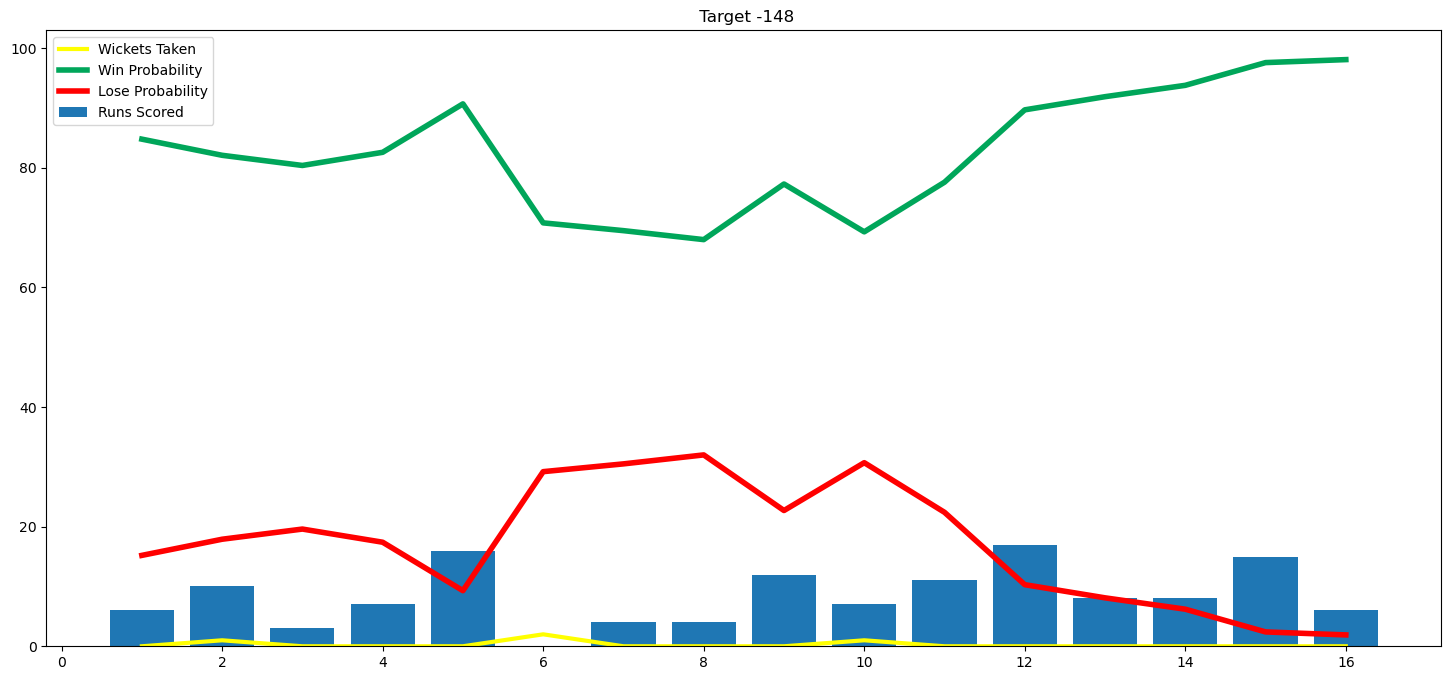

In [52]:
# Importing the matplotlib library for data visualization
import matplotlib.pyplot as plt

# Creating a figure for the plot with a specific size
plt.figure(figsize=(18, 8))

# Plotting the wickets taken over the course of the match with legend
plt.plot(temp_df['end_of_over'], temp_df['wickets_in_over'], color='yellow', linewidth=3, label='Wickets Taken')

# Plotting the probabilities of winning over the course of the match with legend
plt.plot(temp_df['end_of_over'], temp_df['win'], color='#00a65a', linewidth=4, label='Win Probability')

# Plotting the probabilities of losing over the course of the match with legend
plt.plot(temp_df['end_of_over'], temp_df['lose'], color='red', linewidth=4, label='Lose Probability')

# Creating a bar plot for the runs scored after each over
plt.bar(temp_df['end_of_over'], temp_df['runs_after_over'], label='Runs Scored')

# Adding a title to the plot
plt.title(' Target -' + str(target))

# Adding legends to the plot
plt.legend()

# Displaying the plot
plt.show()


In [53]:
# Importing the pickle module for object serialization
#import pickle

# Saving the trained pipeline using pickle
#pickle.dump(pipe, open('pipe.pkl', 'wb'))


In [54]:
# Importing the webbrowser module to open a link in a web browser
import webbrowser

# Defining a function to open a link in the default web browser
def open_link(link):
    webbrowser.open(link)

# Checking if the script is being run as the main program
if __name__ == "__main__":
    # The URL link to be opened in the web browser
    link = "http://localhost:8501/"
    
    # Calling the open_link function to open the specified link in the default web browser
    open_link(link)


# This project predict the outcome of an Indian Premier League (IPL) cricket match. Users can select the batting and bowling teams, the host city, and input match details such as the target score, current score, overs completed, and wickets fallen. The application trained machine learning model to calculate and display the predicted probabilities of each team winning the match.
